In [1]:
import pandas as pd
import datetime
import pprint
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
select_all_in_folder = True
EXPORT_TO_CSV=True
REGEX_MATCHING = True

In [3]:
columns = ["time","priority","class","message","extra"]
date = "2021-05-23-2"
folders = ["messwerte-notify-new/","messwerte-2021-05-25/","messwerte-read/","messwerte-notify-detailed/"]
# folders = ["notify-records/"]
# notify-records folder contains old notify values, which are transfered with to smal data !
filename_app = date+".log"
filename_hci = folders[0] + "hci-"+date+".csv"
device_macs = [mac.lower() for mac in ["24:0A:C4:61:78:D2","24:0A:C4:60:EF:3A","24:0A:C4:60:E5:D2"]]

In [4]:
df = pd.DataFrame()
if select_all_in_folder:
    for folder in folders:
        for filename_hci_tmp in os.listdir(folder):
            print(filename_hci_tmp)
            if filename_hci_tmp.startswith("hci") and filename_hci_tmp.endswith(".csv"):
                df = df.append(pd.read_csv(folder+filename_hci_tmp,encoding='latin1'))
                print("Added")
else:
    df = pd.read_csv(filename_hci,encoding='latin1')
df_original = df
df

hci-notify_ci_256.csv
Added
hci-notify.csv
Added
ci_256.pcapng
hci_ci_64.csv
Added
hci_ci_36.csv
Added
ubertooth_ci_36.csv
ubertooth_ci_64.csv
hci_ci_256.csv
Added
ci_64.pcapng
ubertooth_ci_256.csv
ci_36.pcapng
hci_conn_int_change_notfy_2.csv
Added
hci_conn_int_change_read_and_notify.csv
Added
hci_data_change.csv
Added
hci_mtu_change.csv
Added
hci_mtu_change_2.csv
Added
hci_mtu_change.csv
Added


,No.,Time,Source,Destination,Protocol,Length,Request in Frame,RF Channel,Opcode,Value,Handle,Info,Time.1,UUID
0,1,0.000000,host,controller,HCI_CMD,4,NaN,NaN,NaN,NaN,NaN,Sent Reset,"2021-06-07 14:05:09,970216",NaN
1,2,0.002463,controller,host,HCI_EVT,7,NaN,NaN,NaN,NaN,NaN,Rcvd Command Complete (Reset),"2021-06-07 14:05:09,972679",NaN
2,3,0.002883,host,controller,HCI_CMD,4,NaN,NaN,NaN,NaN,NaN,Sent Read Buffer Size,"2021-06-07 14:05:09,973099",NaN
3,4,0.006051,controller,host,HCI_EVT,14,NaN,NaN,NaN,NaN,NaN,Rcvd Command Complete (Read Buffer Size),"2021-06-07 14:05:09,976267",NaN
4,5,0.006480,host,controller,HCI_CMD,11,NaN,NaN,NaN,NaN,NaN,Sent Host Buffer Size,"2021-06-07 14:05:09,976696",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,747,132.103276,host,controller,HCI_CMD,4,NaN,NaN,NaN,NaN,NaN,Sent LE Clear White List,"2021-06-08 14:38:38,043999",NaN
747,748,132.105342,controller,host,HCI_EVT,7,NaN,NaN,NaN,NaN,NaN,Rcvd Command Complete (LE Clear White List),"2021-06-08 14:38:38,046065",NaN
748,749,133.102490,host,controller,HCI_CMD,7,NaN,NaN,NaN,NaN,NaN,Sent Disconnect,"2021-06-08 14:38:39,043213",NaN
749,750,133.104786,controller,host,HCI_EVT,7,NaN,NaN,NaN,NaN,NaN,Rcvd Command Status (Disconnect),"2021-06-08 14:38:39,045509",NaN


### Clean Data

In [5]:
df = df[df['Protocol'].str.contains("ATT")]

In [6]:
print("Types:\n%s"%df.dtypes)
df.fillna("")
df['Value'] = df['Value'].astype(str)
df['Opcode'] = df['Opcode'].astype(str)
df['Handle'] = df['Handle'].astype(str)
df['UUID'] = df['UUID'].astype(str)

print()
print("Cleaned:\n%s"%df.dtypes)

df

Types:
No.                   int64
Time                float64
Source               object
Destination          object
Protocol             object
Length                int64
Request in Frame    float64
RF Channel          float64
Opcode               object
Value                object
Handle               object
Info                 object
Time.1               object
UUID                 object
dtype: object

Cleaned:
No.                   int64
Time                float64
Source               object
Destination          object
Protocol             object
Length                int64
Request in Frame    float64
RF Channel          float64
Opcode               object
Value                object
Handle               object
Info                 object
Time.1               object
UUID                 object
dtype: object


<ipython-input-6-4aeacd67551a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = df['Value'].astype(str)
<ipython-input-6-4aeacd67551a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Opcode'] = df['Opcode'].astype(str)
<ipython-input-6-4aeacd67551a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,No.,Time,Source,Destination,Protocol,Length,Request in Frame,RF Channel,Opcode,Value,Handle,Info,Time.1,UUID
357,358,9.060421,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,16,NaN,NaN,Read By Group Type Request,nan,nan,"Sent Read By Group Type Request, GATT Primary ...","2021-06-07 14:05:19,030637",nan
360,361,9.201632,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,23,358.0,NaN,Read By Group Type Response,nan,"0x0001,0x0014","Rcvd Read By Group Type Response, Attribute Li...","2021-06-07 14:05:19,171848",nan
361,362,9.202503,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,16,NaN,NaN,Read By Group Type Request,nan,nan,"Sent Read By Group Type Request, GATT Primary ...","2021-06-07 14:05:19,172719",nan
363,364,9.299292,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,31,362.0,NaN,Read By Group Type Response,nan,0x0028,"Rcvd Read By Group Type Response, Attribute Li...","2021-06-07 14:05:19,269508","26cb2f28a4ba49fc856ad57fe4d3dada,dadad3e47fd56..."
364,365,9.300358,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,16,NaN,NaN,Read By Type Request,nan,nan,"Sent Read By Type Request, GATT Include Declar...","2021-06-07 14:05:19,270574",nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,704,129.476623,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (),ATT,16,NaN,NaN,Write Request,52454144,0x002c,"Sent Write Request, Handle: 0x002c (Unknown: U...","2021-06-08 14:38:35,417346",8c65f73dddab4dd9a2e0f5a10ce7e252
704,705,129.589121,Espressi_60:ef:3a (),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,10,704.0,NaN,Write Response,nan,0x002c,"Rcvd Write Response, Handle: 0x002c (Unknown: ...","2021-06-08 14:38:35,529844",8c65f73dddab4dd9a2e0f5a10ce7e252
705,706,129.589549,Espressi_60:ef:3a (),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,140,NaN,NaN,Handle Value Notification,446174612053697a65203132386e6f7071727374757677...,0x0030,"Rcvd Handle Value Notification, Handle: 0x0030...","2021-06-08 14:38:35,530272",1ee1d0fc6f3c4c6aac1cc54d2a97f932
707,708,131.758939,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (),ATT,16,NaN,NaN,Handle Value Indication,nan,0x0003,"Sent Handle Value Indication, Handle: 0x0003 (...","2021-06-08 14:38:37,699662",nan


### Add Time

In [7]:
df["Time.1"] = pd.to_datetime(df["Time.1"],format="%Y-%m-%d %H:%M:%S,%f")+ pd.Timedelta(hours=1)
df = df.sort_values("Time.1")
df

<ipython-input-7-623deb7f0879>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time.1"] = pd.to_datetime(df["Time.1"],format="%Y-%m-%d %H:%M:%S,%f")+ pd.Timedelta(hours=1)


,No.,Time,Source,Destination,Protocol,Length,Request in Frame,RF Channel,Opcode,Value,Handle,Info,Time.1,UUID
15784,15785,289.173475,localhost (),Espressi_60:ef:3a (ESP32-T),ATT,16,NaN,NaN,Read By Group Type Request,nan,nan,"Sent Read By Group Type Request, GATT Primary ...",2021-05-25 16:38:42.303438,nan
15787,15788,289.318103,Espressi_60:ef:3a (ESP32-T),localhost (),ATT,23,15785.0,NaN,Read By Group Type Response,nan,"0x0001,0x0014","Rcvd Read By Group Type Response, Attribute Li...",2021-05-25 16:38:42.448066,nan
15788,15789,289.318913,localhost (),Espressi_60:ef:3a (ESP32-T),ATT,16,NaN,NaN,Read By Group Type Request,nan,nan,"Sent Read By Group Type Request, GATT Primary ...",2021-05-25 16:38:42.448876,nan
15790,15791,289.418063,Espressi_60:ef:3a (ESP32-T),localhost (),ATT,31,15789.0,NaN,Read By Group Type Response,nan,0x0028,"Rcvd Read By Group Type Response, Attribute Li...",2021-05-25 16:38:42.548026,"26cb2f28a4ba49fc856ad57fe4d3dada,dadad3e47fd56..."
15791,15792,289.418906,localhost (),Espressi_60:ef:3a (ESP32-T),ATT,16,NaN,NaN,Read By Type Request,nan,nan,"Sent Read By Type Request, GATT Include Declar...",2021-05-25 16:38:42.548869,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,1415,222.052188,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,32,1414.0,NaN,Read Blob Response,7778797a6162636465666768696a6b6c6d6e6f707172,0x002a,"Rcvd Read Blob Response, Handle: 0x002a (Unkno...",2021-06-12 11:36:38.004213,fbdc45f28337467b8019e7db05355215
1415,1416,222.052887,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,14,NaN,NaN,Read Blob Request,nan,0x002a,"Sent Read Blob Request, Handle: 0x002a (Unknow...",2021-06-12 11:36:38.004912,fbdc45f28337467b8019e7db05355215
1417,1418,222.211614,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,32,1416.0,NaN,Read Blob Response,737475767778797a6162636465666768696a6b6c6d6e,0x002a,"Rcvd Read Blob Response, Handle: 0x002a (Unkno...",2021-06-12 11:36:38.163639,fbdc45f28337467b8019e7db05355215
1418,1419,222.212199,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,14,NaN,NaN,Read Blob Request,nan,0x002a,"Sent Read Blob Request, Handle: 0x002a (Unknow...",2021-06-12 11:36:38.164224,fbdc45f28337467b8019e7db05355215


### Split Data into Mac Adresses

In [8]:
devices = list(set(df['Destination']))
print("Devices:%s"%devices)
devices = [d for d in devices if d.startswith("Espressi")]
# Expected addr: Espressi_xx:xx:xx ()
devices = [d.split("_")[1][:8] for d in devices]
devices = list(set(devices))
devices

Devices:['Espressi_60:ef:3a (ESP32-T)', 'HuaweiTe_27:59:79 (HUAWEI P20 Pro)', 'localhost ()', 'Espressi_60:ef:3a ()']


['60:ef:3a']

In [9]:
device_df_dict = dict()
for device_mac in devices:
    df_other_device = df[df["Source"].str.contains(device_mac)]
    df_other_device = df_other_device.append(df[df["Destination"].str.contains(device_mac)],ignore_index=True)
    device_df_dict[device_mac]=df_other_device
[print(key,value.shape) for key,value in device_df_dict.items()]


60:ef:3a (7091, 14)


[None]

### Clean Data

In [10]:
for k,df in device_df_dict.items():
    device_df_dict[k] = df.drop(["Source","Destination","Protocol"],axis=1)

### Add Packet Types

In [11]:
uuid_map = dict({ #"26cb2f28-a4ba-49fc-856a-d57fe4d3dada":"SERVICE_UUID_MAIN",
"fbdc45f2-8337-467b-8019-e7db05355215":"CHARACTERISTIC_UUID_READ",
"8c65f73d-ddab-4dd9-a2e0-f5a10ce7e252":"CHARACTERISTIC_UUID_WRITE_COMMAND",
"f3410822-00c0-4dd3-a60b-3cd6124fd323":"CHARACTERISTIC_UUID_WRITE_SIZE",
"1ee1d0fc-6f3c-4c6a-ac1c-c54d2a97f932":"CHARACTERISTIC_UUID_NOTIFY",
"83157f66-7c91-431e-a037-7c2b9e594ef6":"CHARACTERISTIC_UUID_INDICATE",
"46ac40cc-7eaa-41a9-9964-956a984fd9c3":"CHARACTERISTIC_UUID_CONN_INTERVAL"})
uuid_map = {k.replace("-",""):v.replace("CHARACTERISTIC_UUID_","") for k,v in uuid_map.items()}


In [12]:
def checkPaketType(row):  
    uuid = row['UUID']
    if uuid in uuid_map.keys():
        if "Response" in row['Opcode']:
            return uuid_map[uuid] + " Rcvd"
        elif "Request" in row['Opcode']:
            return uuid_map[uuid] + " Req"
        else:
            return uuid_map[uuid]
    else:
        return ""
    
for k,df in device_df_dict.items():
    df = device_df_dict[k]
    device_df_dict[k]['Pakettype'] = df.apply(axis=1,func = checkPaketType)
    print(k,'Pakettypes:%s'%list(set(device_df_dict[k]['Pakettype'].values)))

60:ef:3a Pakettypes:['', 'READ Rcvd', 'CONN_INTERVAL Rcvd', 'INDICATE Rcvd', 'CONN_INTERVAL Req', 'WRITE_SIZE Rcvd', 'WRITE_COMMAND Rcvd', 'READ Req', 'WRITE_COMMAND Req', 'WRITE_SIZE Req', 'NOTIFY']


In [13]:
no_type_dict = dict()
for addr in devices:
    df = device_df_dict[addr]
    no_type_dict[addr] = df[~df['Pakettype'].apply(lambda x:len(x)>0)]
    device_df_dict[addr] = df.drop(no_type_dict[addr].index.values)
    print(addr,"no types:",no_type_dict[addr].shape)

60:ef:3a no types: (664, 12)


### Cant Define Hops on HCI

### Define Settings

In [14]:
def hex_string_to_int(string,reverse=True):
    if reverse:
        string = "".join(reversed([string[i:i+2] for i in range(0, len(string),2)]))
    print(string,"->",int(string,16))
    return int(string,16)
    
def mtu_df_to_list_of_tuple(df):
    df_tmp =  df[df['Opcode'].str.contains("Response")]
    mtu_updates = []
    for _,row in df_tmp.iterrows():
        mtu_size = int(row['Info'].split("MTU:")[-1].strip())
        time = row['Time.1']
        mtu_updates.append((time,mtu_size))
    return mtu_updates

def conn_interval_df_to_list_of_tuple(df):
    df_tmp =  df[df['Opcode'].str.contains("Request")]
    interval_updates = []
    for _,row in df_tmp.iterrows():
        conn_update = hex_string_to_int(row['Value'],reverse=True)
        time = row['Time.1']
        interval_updates.append((time,conn_update))
    return interval_updates

def data_size_df_to_list_of_tuple(df):
    df_tmp =  df[df['Opcode'].str.contains("Request")]
    size_updates = []
    for _,row in df_tmp.iterrows():
        data_size = hex_string_to_int(row['Value'],reverse=True)
        time = row['Time.1']
        size_updates.append((time,data_size))
    return size_updates

In [15]:
mtu_update_dict = dict()
size_update_dict = dict()
interval_update_dict = dict()
for addr in devices:
    df_no_type = no_type_dict[addr]
    df = device_df_dict[addr]
    
    df_update_mtu = df_no_type[df_no_type['Opcode'].str.contains("Exchange MTU")]
    mtu_update_dict[addr] = mtu_df_to_list_of_tuple(df_update_mtu)
    mtu_update_dict[addr].sort(key=lambda pair:pair[0])
    print("MTU Updates:")
    pprint.pprint(mtu_update_dict[addr])
    
    df_update_size = df[df['Pakettype'].str.contains("WRITE_SIZE")]
    size_update_dict[addr] = data_size_df_to_list_of_tuple(df_update_size)
    size_update_dict[addr].sort(key=lambda pair:pair[0])
    pprint.pprint("Size Updates:")
    pprint.pprint(size_update_dict[addr])
    
    df_update_interval = df[df['Pakettype'].str.contains("CONN_INTERVAL")]
    interval_update_dict[addr] =  conn_interval_df_to_list_of_tuple(df_update_interval)
    interval_update_dict[addr].sort(key=lambda pair:pair[0])
    pprint.pprint("Interval Updates:")
    pprint.pprint(interval_update_dict[addr])
    
    device_df_dict[addr] = device_df_dict[addr].drop(df_update_size.index.values)
    device_df_dict[addr] = device_df_dict[addr].drop(df_update_interval.index.values)

MTU Updates:
[(Timestamp('2021-05-25 16:38:56.018516'), 23),
 (Timestamp('2021-05-25 16:40:17.918233'), 32),
 (Timestamp('2021-05-25 16:41:29.017756'), 64),
 (Timestamp('2021-05-25 16:42:25.447630'), 128),
 (Timestamp('2021-05-25 16:43:09.907797'), 256),
 (Timestamp('2021-05-25 16:57:04.386074'), 23),
 (Timestamp('2021-05-25 16:58:37.908050'), 32),
 (Timestamp('2021-05-25 16:59:56.865378'), 64),
 (Timestamp('2021-05-25 17:01:02.065250'), 128),
 (Timestamp('2021-05-25 17:01:49.265453'), 256),
 (Timestamp('2021-05-26 14:48:04.410271'), 23),
 (Timestamp('2021-05-26 14:50:47.610334'), 32),
 (Timestamp('2021-05-26 14:52:50.810824'), 64),
 (Timestamp('2021-05-26 14:55:03.611235'), 128),
 (Timestamp('2021-05-26 14:56:14.010948'), 256),
 (Timestamp('2021-06-07 13:08:35.003519'), 23),
 (Timestamp('2021-06-07 13:10:02.393520'), 23),
 (Timestamp('2021-06-07 13:10:34.073597'), 32),
 (Timestamp('2021-06-07 13:11:53.724148'), 64),
 (Timestamp('2021-06-07 13:12:46.103277'), 128),
 (Timestamp('2021-06

00000024 -> 36
00000040 -> 64
00000080 -> 128
00000100 -> 256
00000200 -> 512
00000400 -> 1024
00000040 -> 64
'Interval Updates:'
[(Timestamp('2021-05-25 16:38:50.142473'), 36),
 (Timestamp('2021-05-25 16:57:02.349029'), 64),
 (Timestamp('2021-05-26 14:47:44.045902'), 256),
 (Timestamp('2021-06-07 13:08:31.764696'), 36),
 (Timestamp('2021-06-07 13:10:00.115906'), 36),
 (Timestamp('2021-06-07 13:14:07.629788'), 64),
 (Timestamp('2021-06-07 15:05:34.977183'), 64),
 (Timestamp('2021-06-07 15:07:58.732830'), 256),
 (Timestamp('2021-06-07 16:55:17.027301'), 64),
 (Timestamp('2021-06-08 15:35:25.177387'), 64),
 (Timestamp('2021-06-08 15:36:31.071164'), 64),
 (Timestamp('2021-06-08 16:45:44.203377'), 36),
 (Timestamp('2021-06-08 16:46:02.683775'), 64),
 (Timestamp('2021-06-08 16:46:29.787561'), 128),
 (Timestamp('2021-06-08 16:46:46.623498'), 256),
 (Timestamp('2021-06-08 16:47:13.535080'), 512),
 (Timestamp('2021-06-08 16:47:42.337676'), 1024),
 (Timestamp('2021-06-08 16:48:56.710301'), 36),

### Define Read & Notify Requests NO REGEX WAY

In [16]:
%run UbertoothHelpClasses.ipynb

Data Size 64mnopqrstuvwxyzabcdefghijklmnopqrstuvwxyzabcdefghijkl 64
72


#### READS

In [17]:
if not REGEX_MATCHING:
    read_requests = dict()
    for addr in devices:
        read_requests[addr] = []
        latest_request = None
        df = device_df_dict[addr]
        df_reads = df[df['Pakettype'].str.contains("READ")]
        df_reads = df_reads.sort_values("Time.1")
        if len(df_reads.index.values) >0:
            for i,row in df_reads.iterrows():
                # print(i,row['Opcode'])
                if latest_request is None:
                    latest_request = Request(row['Pakettype'])
                opcode = row['Opcode'] 
                read_row = df_reads.loc[i]
                pakettype = row['Pakettype']
                if 'Read Response' in opcode:
                    latest_request.state_pause()
                    latest_request.add(read_row)
                elif 'Read Request' in opcode:
                    if latest_request.state == "pause":
                        latest_request.state_close()
                        if latest_request.isValid:
                            read_requests[addr].append(latest_request)
                        latest_request = Request(pakettype)
                        latest_request.add(read_row)
                    else:
                        latest_request.add(read_row)
                elif 'Read Blob Request' in opcode:
                    latest_request.add(read_row)
                elif "Read Blob Response" in row['Opcode']:
                    latest_request.add(read_row)

            if latest_request.state == "pause":
                latest_request.state_close()
                if latest_request.isValid:
                    read_requests[addr].append(latest_request)
            for r in read_requests[addr]:
                print(r.request_type,r.duration,r.df.shape)


#### NOTIFYS

In [18]:
if not REGEX_MATCHING:
    write_requests=dict()
    for addr in devices:
        write_requests[addr] = []
        latest_request = None
        df = device_df_dict[addr]
        df_writes = df[~df['Pakettype'].str.contains("READ")]
        df_writes = df_writes[~df_writes['Opcode'].str.contains("Error")]
        df_writes = df_writes.sort_values("Time.1")
        if len(df_writes.index.values) >0:
            for i,row in df_writes.iterrows():
                #print(i,row['Pakettype'],row['Opcode'])
                if latest_request is None:
                    latest_request = Request(row['Pakettype'])
                if 'Rcvd' in row['Pakettype'] or 'NOTIFY' in row['Pakettype']:
                    if 'NOTIFY' in row['Pakettype']:
                        latest_request.state_pause()
                    latest_request.add(df_writes.loc[i])
                elif 'Req' in row['Pakettype']:
                    if latest_request.state == "pause":
                        latest_request.state_close()
                        if(latest_request.isValid):
                            write_requests[addr].append(latest_request)
                        latest_request = Request(row['Pakettype'])
                        latest_request.add(df_writes.loc[i])
                    else:
                        latest_request.add(df_writes.loc[i])

            if latest_request.state == "pause":
                latest_request.state_close()
                if(latest_request.isValid):
                    write_requests[addr].append(latest_request)

### Define Read & Notify Requests REGEX WAY
Request -> A  
Following Request -> C  
Response -> B  
Following Response -> D  
Notify -> D  

In [19]:
import re

In [20]:
paket_regex_map = dict({'Error Response':'Z', 
                        'Read Blob Response':'D', 
                        'Read Response':'B', 
                        'Handle Value Notification':'D', 
                        'Write Request':'A', 
                        'Write Response':'B', 
                        'Read Blob Request':'C', 
                        'Read Request':'A'
                       })


In [21]:
# examples for regex
test = "ABABABCDABCDAB"
for i in re.finditer('(AB)(CD)*',test):
    print(i)
test_2 = 'ABDDDABDDDBDDDAD'
for i in re.finditer('(AB|A|B)D*',test_2):
    print(i)


<re.Match object; span=(0, 2), match='AB'>
<re.Match object; span=(2, 4), match='AB'>
<re.Match object; span=(4, 8), match='ABCD'>
<re.Match object; span=(8, 12), match='ABCD'>
<re.Match object; span=(12, 14), match='AB'>
<re.Match object; span=(0, 5), match='ABDDD'>
<re.Match object; span=(5, 10), match='ABDDD'>
<re.Match object; span=(10, 14), match='BDDD'>
<re.Match object; span=(14, 16), match='AD'>


In [22]:
if REGEX_MATCHING:
    read_requests = dict()
    for addr in devices:
        read_requests[addr] = []
        df = device_df_dict[addr]
        # Filter on Opcode == READ Req && READ Rcvd
        df.sort_values("Time.1",inplace=True)
        df = df[df['Opcode'].apply(lambda op:op in ['Read Request','Read Blob Request','Read Response','Read Blob Response'])]
        column_to_string = "".join(list(df['Opcode'].map(paket_regex_map).values))
        print(column_to_string)
        for i in re.finditer('(AB)(CD)*',column_to_string):
            first = i.span(0)[0]
            last = i.span(0)[1]
            request_type = df.iloc[first]['Pakettype']
            request = Request(request_type)
            request.add(df.iloc[first:last])
            request.state_close()
            read_requests[addr].append(request)

    for addr in devices:
        print(addr,":",len(read_requests[addr]))
        print("bsp first request:")
        try:
            print(read_requests[addr][0])
        except:
            pass

ABABABABCDABCDABCDABCDCDABCDCDABCDCDABCDCDCDCDCDABCDCDCDCDCDABCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDABABABABCDABCDABCDABCDCDABCDCDABCDCDABCDCDCDCDABCDCDCDCDABCDCDCDCDABCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDABABABABABABABCDABCDABCDABCDCDABCDCDABCDCDABCDCDCDCDABCDCDCDCDABCDCDCDCDABCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDABABABABABABABABABABCDABCDABCDABCDCDABCDCDABCDCDABCDCDCDCDABCDCDCDCDABCDCDCDCDABABABABABABABABABABABABABCDABCDABCDABCDCDABCDCDABCDCDABABABABABCDABCDABCDABCDCDABCDCDABCDCDABCDCDCDCDCDABCDCDCDCDCDABCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCD

In [23]:
if REGEX_MATCHING:
    write_requests = dict()
    for addr in devices:
        write_requests[addr] = []
        df = device_df_dict[addr]
        # Filter on Opcode == READ Req && READ Rcvd
        df.sort_values("Time.1",inplace=True)
        df = df[df['Opcode'].apply(lambda op:op in ['Handle Value Notification','Write Request','Write Response'])]
        column_to_string = "".join(list(df['Opcode'].map(paket_regex_map).values))
        print(column_to_string)
        for i in re.finditer('(AB|A|B)D*',column_to_string):
            first = i.span(0)[0]
            last = i.span(0)[1]
            request_type = df.iloc[first]['Pakettype']
            request = Request(request_type)
            request.add(df.iloc[first:last])
            request.state_close()
            write_requests[addr].append(request)

    for addr in devices:
        print(addr,":",len(write_requests[addr]))
        print("bsp first request:")
        print(write_requests[addr][0])

ABDABDABDABDDABDDABDDABDDDDABDDDDABDDDDABDDDDDDDABDDDDDDDABDDDDDDDABDDDDDDDDDDDDDABDDDDDDDDDDDDDABDDDDDDDDDDDDDABDDDDDDDDDDDDDABDDDDDDDDDDDDDABDDDDDDDDDDDDDABDDDDDDDDDDDDDDDDDDDDDDDDDDABDDDDDDDDDDDDDDDDDDDDDDDDDDABDDDDDDDDDDDDDDDDDDDDDDDDDDABDABDABDABDDABDDABDDABDDDABDDDABDDDABDDDDDABDDDDDABDDDDDABDDDDDDDDDABDDDDDDDDDABDDDDDDDDDABDDDDDDDDDDDDDDDDDDABDDDDDDDDDDDDDDDDDDABDDDDDDDDDDDDDDDDDDABDABDABDABDABDABDABDDABDDABDDABDDDABDDDABDDDABDDDDDABDDDDDABDDDDDABDDDDDDDDDABDDDDDDDDDABDDDDDDDDDABDABDABDABDABDABDABDABDABDABDDABDDABDDABDDDABDDDABDDDABDDDDDABDDDDDABDDDDDABDABDABDABDABDABDABDABDABDABDABDABDABDDABDDABDDABDDDABDDDABDDDABDABDABDABDDABDDABDDDDABDDDDABDDDDABDDDDDDDABDDDDDDDABDDDDDDDABDDDDDDDDDDDDDABDDDDDDDDDDDDDABDDDDDDDDDDDDDABDDDDDDDDDDDDDDDDDDDDDDDDDDABDDDDDDDDDDDDDDDDDDDDDDDDDDABDDDDDDDDDDDDDDDDDDDDDDDDDDABDABDABDABDDABDDABDDABDDDABDDDABDDDABDDDDDABDDDDDABDDDDDABDDDDDDDDDABDDDDDDDDDABDDDDDDDDDABDDDDDDDDDDDDDDDDDDABDDDDDDDDDDDDDDDDDDABDDDDDDDDDDDDDDDDDDABDABDABDABDABDABDABDDABDDABDDAB

### Combine Settings and Requests

In [24]:
all_requests = dict()
for addr in devices:
    print("addr:",addr,"combine",len(write_requests[addr]),"notify requests and",len(read_requests[addr]),"read requests")
    all_requests[addr] = write_requests[addr] + read_requests[addr]
    for r in all_requests[addr]:
        start_time = r.starting_time
        latest_mtu_updates = [mtu_update for mtu_update in mtu_update_dict[addr] if mtu_update[0] < start_time]
        latest_mtu_update = latest_mtu_updates[-1]
        r.set_mtu_size(latest_mtu_update[1])
        
        latest_data_updates = [update for update in size_update_dict[addr] if update[0] < start_time]
        latest_data_update = latest_data_updates[-1]
        r.set_data_size(latest_data_update[1])
                
        latest_conn_interval_updates = [update for update in interval_update_dict[addr] if update[0] < start_time]
        latest_conn_interval_update= latest_conn_interval_updates[-1]
        r.set_conn_interval(latest_conn_interval_update[1])
for addr in devices:
    index_to_check = 0
    print("bsp first request:",all_requests[addr][index_to_check],len(all_requests[addr][index_to_check].get_data(True)))

addr: 60:ef:3a combine 350 notify requests and 394 read requests
org 446174612053697a652032306d6e6f7071727374
conversion Data Size 20mnopqrst
bsp first request: {'request_type': 'WRITE_COMMAND Req', 'starting_time': Timestamp('2021-06-07 13:08:41.922114'), 'ending_time': Timestamp('2021-06-07 13:08:41.978780'), 'duration': Timedelta('0 days 00:00:00.056666'), 'data_size': 20, 'mtu_size': 23, 'conn_interval': 36, 'data': 'Data Size 20mnopqrst', 'read_requests': 0, 'read_responses': 0, 'notifies': 1} 20


In [25]:
dataframe = pd.DataFrame()
for addr in devices:
    requests_dataframe = pd.DataFrame.from_dict([r.as_dict() for r in all_requests[addr]])
    dataframe = dataframe.append(requests_dataframe)
# dataframe.groupby(["conn_interval","mtu_size","data_size","request_type"]).max()
#dataframe.set_index(["conn_interval","mtu_size","data_size","request_type"],inplace=True)
dataframe['duration'] = dataframe['duration'].apply(lambda dt:dt.seconds * 1_000_000 + dt.microseconds)
if EXPORT_TO_CSV:
    dataframe.to_csv("HCI_Output.csv")
dataframe = dataframe.drop(["starting_time","ending_time"],axis=1)
dataframe

,request_type,duration,data_size,mtu_size,conn_interval,data,read_requests,read_responses,notifies
0,WRITE_COMMAND Req,56666,20,23,36,Data Size 20mnopqrst,0,0,1
1,WRITE_COMMAND Req,62519,20,23,36,Data Size 20mnopqrst,0,0,1
2,WRITE_COMMAND Req,50854,20,23,36,Data Size 20mnopqrst,0,0,1
3,WRITE_COMMAND Req,60093,32,23,36,Data Size 32mnopqrstuvwxyzabcdef,0,0,2
4,WRITE_COMMAND Req,57910,32,23,36,Data Size 32mnopqrstuvwxyzabcdef,0,0,2
...,...,...,...,...,...,...,...,...,...
739,READ Req,2816905,352,23,64,Data Size 352nopqrstuvwxyzabcdefghijklmnopqrst...,17,17,0
740,READ Req,2664478,352,23,64,Data Size 352nopqrstuvwxyzabcdefghijklmnopqrst...,17,17,0
741,READ Req,2757100,353,23,64,Data Size 353nopqrstuvwxyzabcdefghijklmnopqrst...,17,17,0
742,READ Req,2683764,353,23,64,Data Size 353nopqrstuvwxyzabcdefghijklmnopqrst...,17,17,0


36
64
128
256


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


512
1024


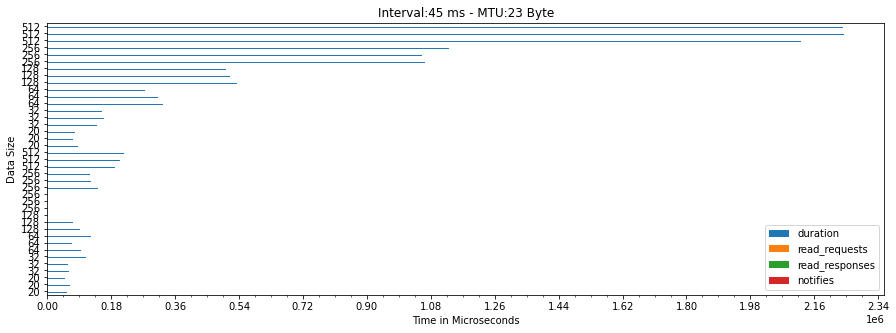

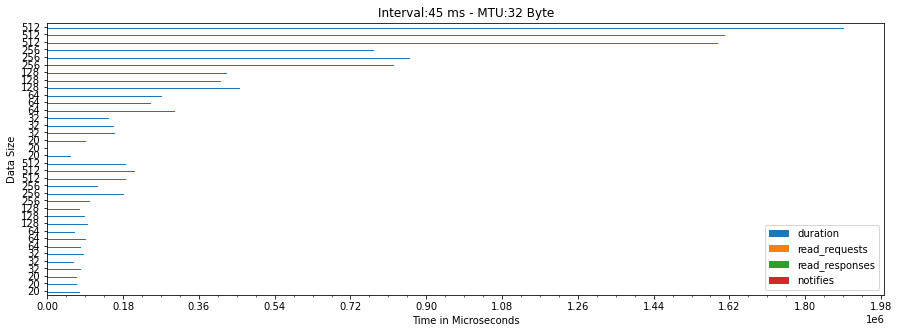

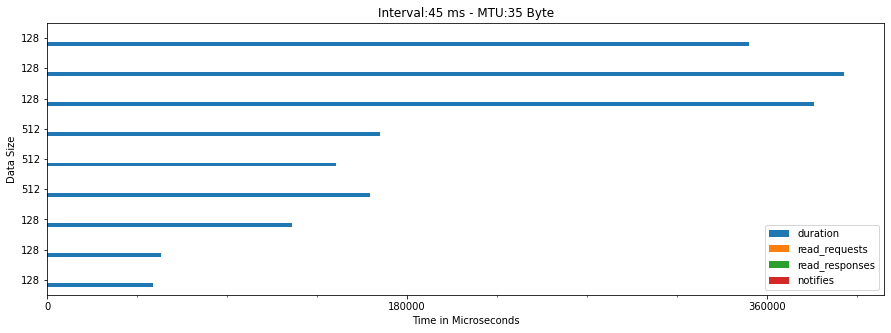

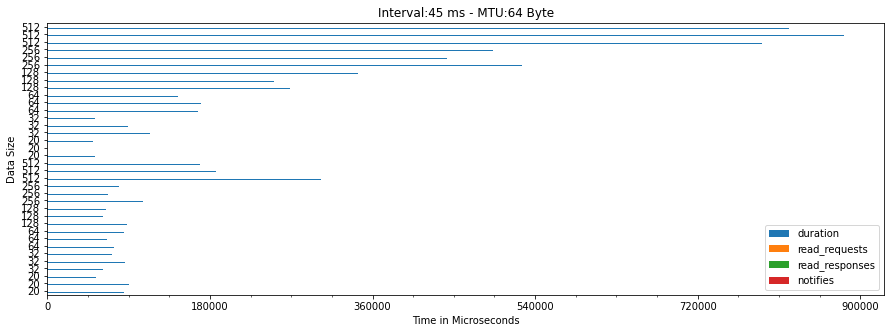

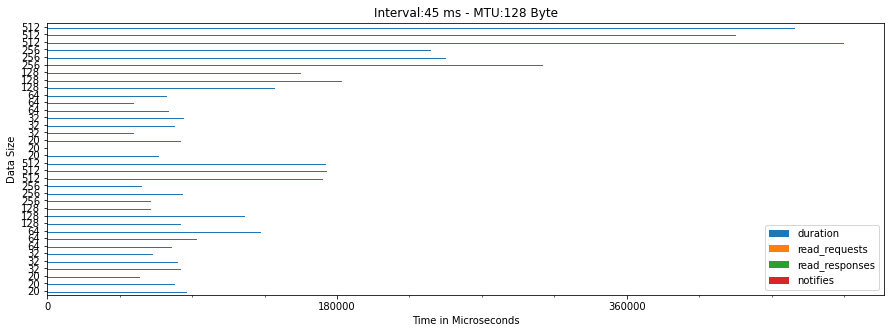

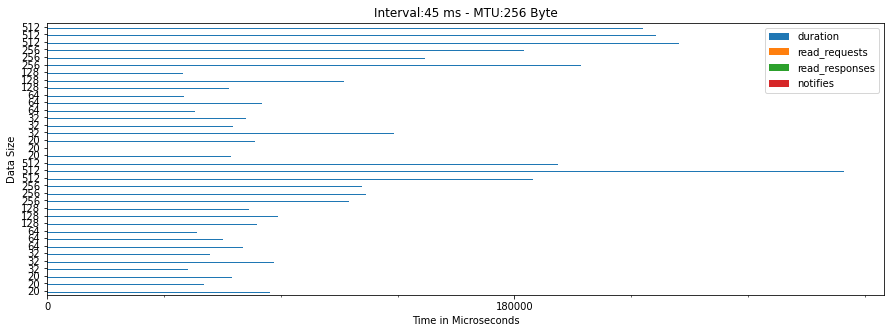

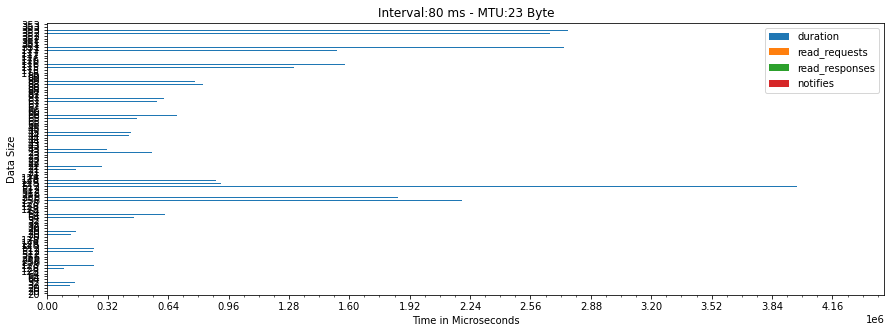

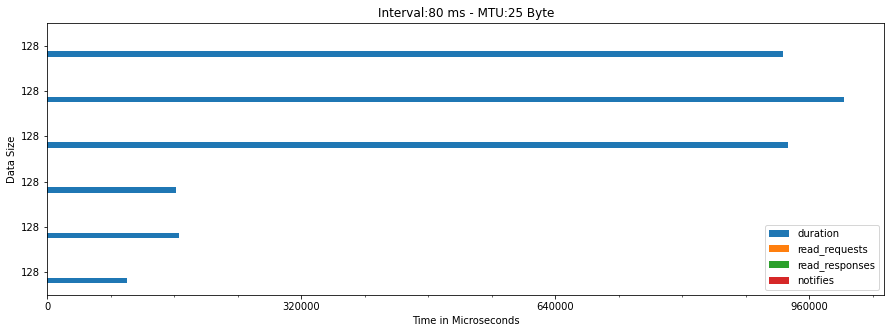

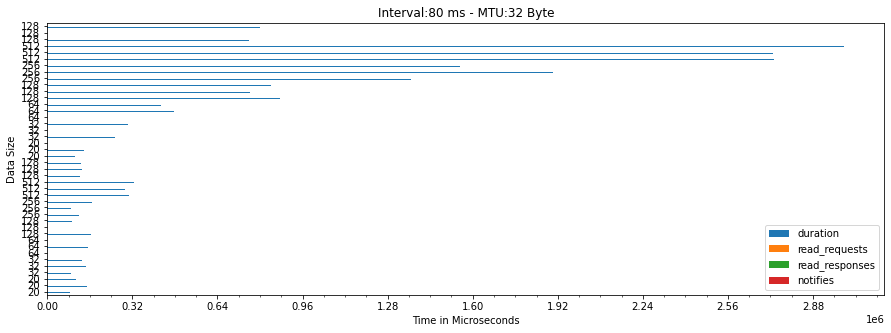

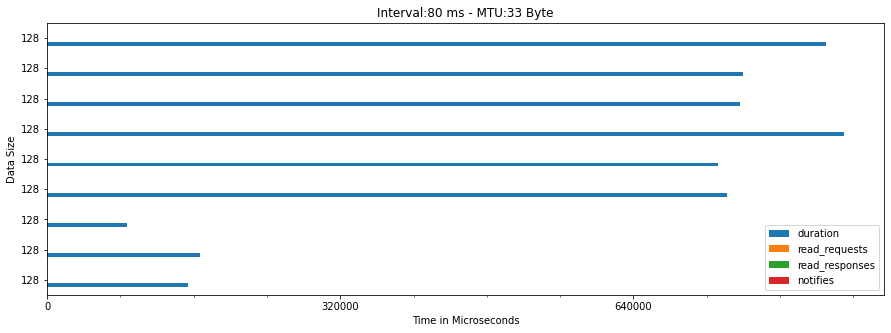

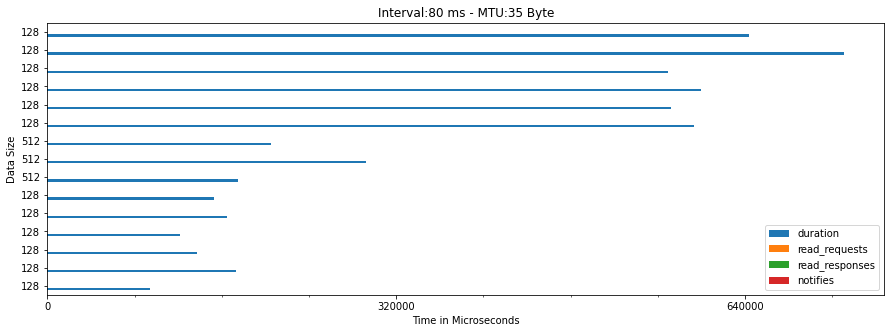

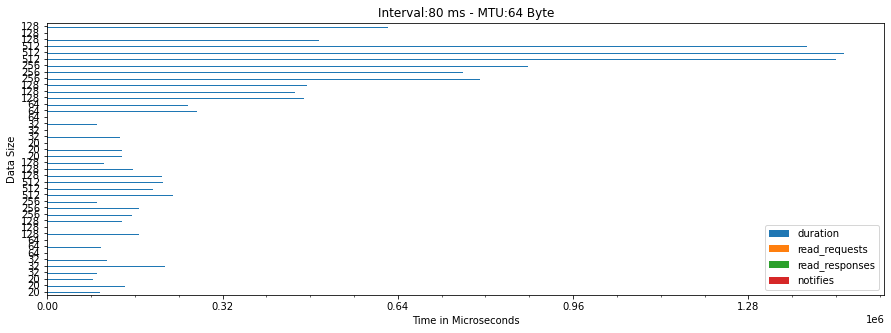

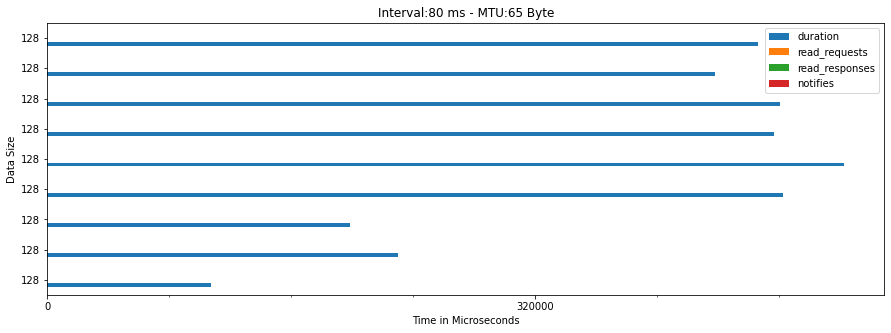

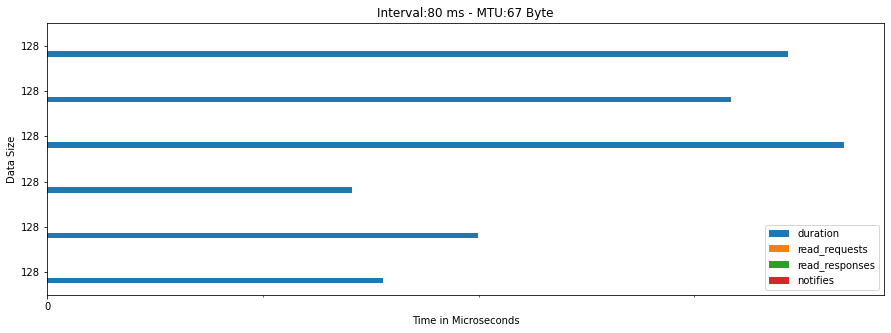

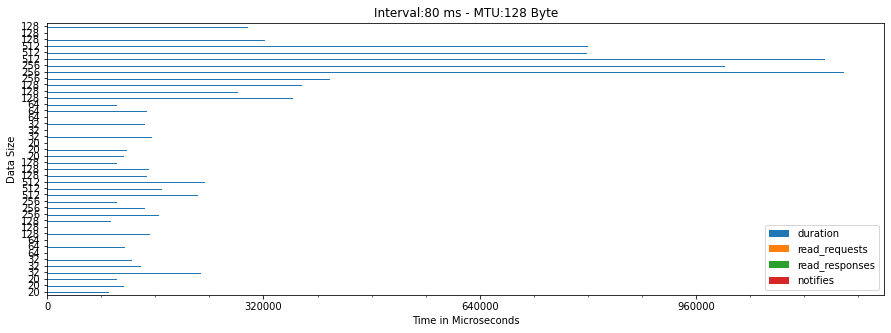

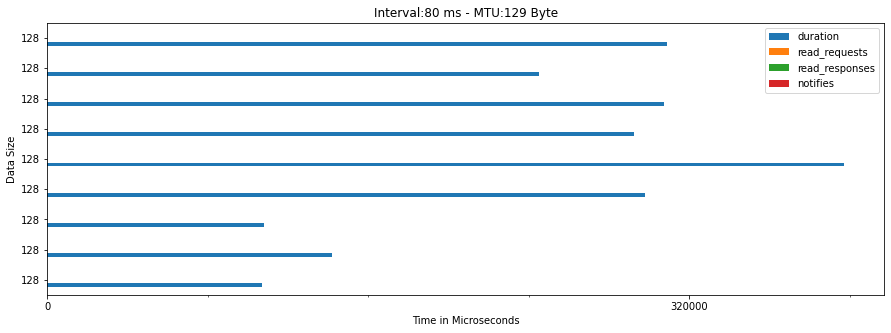

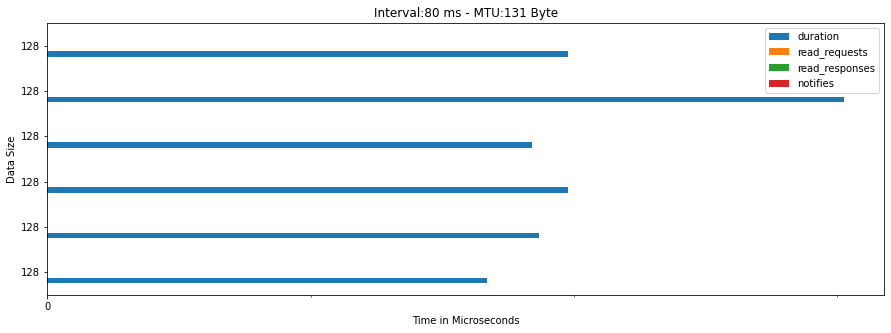

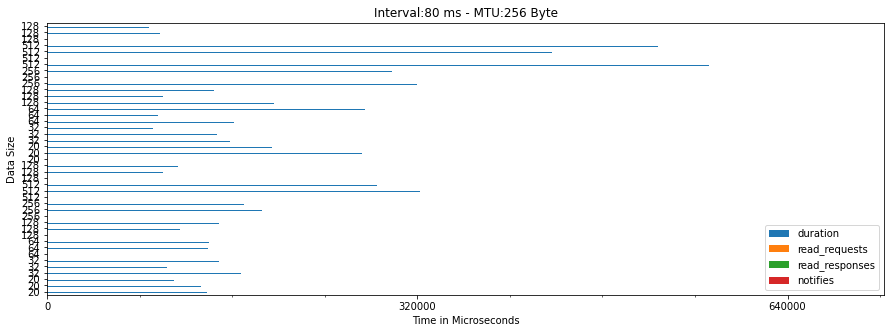

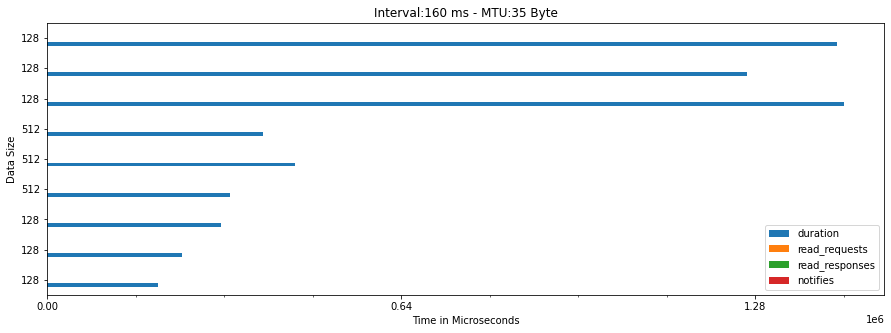

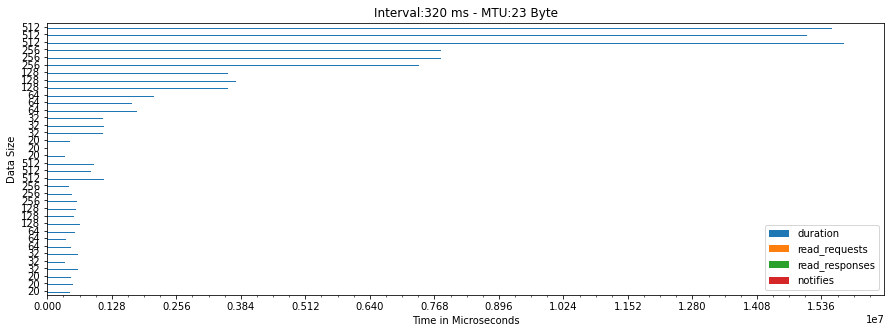

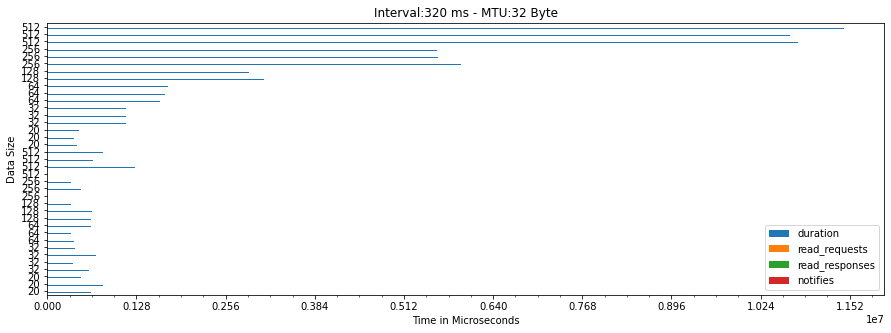

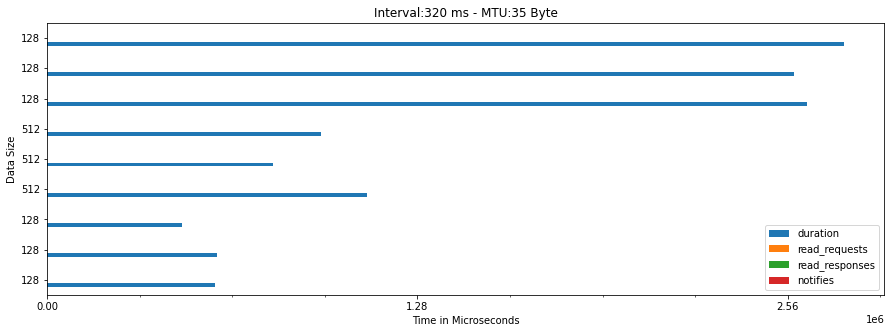

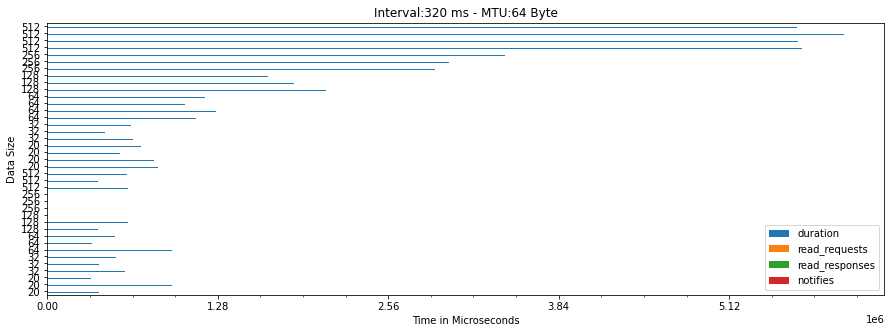

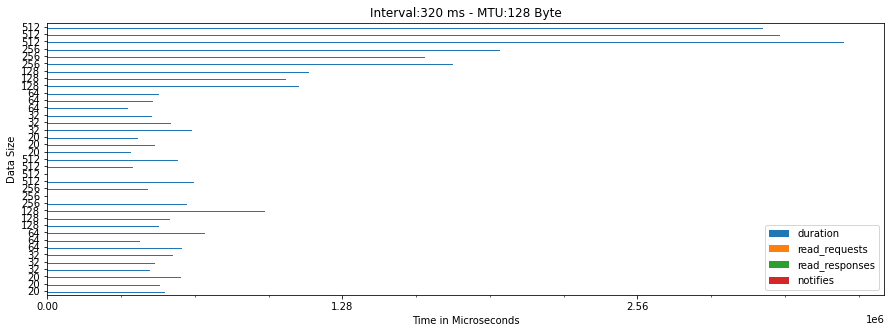

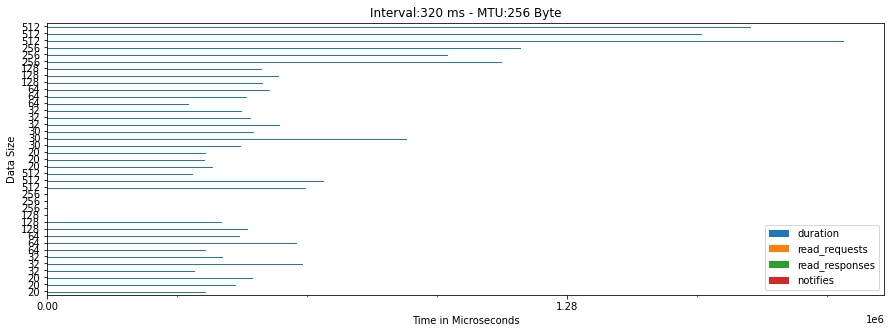

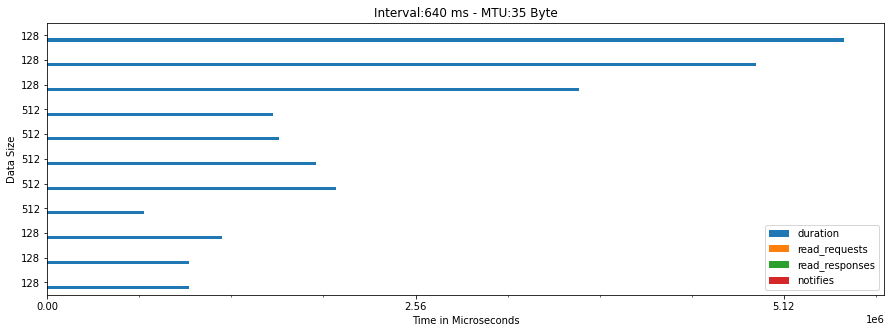

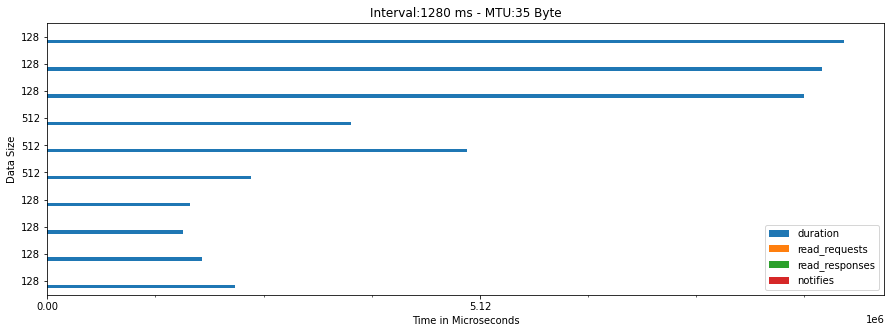

In [26]:
dfs =[(i,x) for i,x in dataframe.groupby("conn_interval")]
for interval,df in dfs:
    print(interval)
    step = int(interval*1.25*1_000)
    df_sizes = [(s,x) for s,x in df.groupby("mtu_size")]
    for size,df_size in df_sizes:
        xticks = range(0,step*int(df_size['duration'].max()/step + 2),step*4)
        subplot = df_size.drop(["mtu_size","conn_interval"],axis=1).set_index(["data_size"]).plot.barh(figsize=(15,5))
        subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step*4))
        subplot.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(step))
        subplot.set_aspect("auto")
        subplot.set_ylabel("Data Size")
        subplot.set_xlabel("Time in Microseconds")
        subplot.set_title("Interval:%d ms - MTU:%d Byte"%(int(interval*1.25),int(size)))

In [27]:
pd.set_option("display.max_rows", 200)
dataframe.groupby(["mtu_size","data_size","conn_interval","request_type"])["duration"].std()

mtu_size  data_size  conn_interval  request_type     
23        20         36             READ Req               6383.406301
                                    WRITE_COMMAND Req      5832.512009
                     64             READ Req              12962.577393
                                    WRITE_COMMAND Req     22415.563730
                     256            READ Req             134132.171325
                                                             ...      
256       512        36             WRITE_COMMAND Req     66715.671205
                     64             READ Req             104945.818648
                                    WRITE_COMMAND Req     23941.332468
                     256            READ Req             177980.860485
                                    WRITE_COMMAND Req    175075.725342
Name: duration, Length: 229, dtype: float64

In [28]:
mtu = 23
interval = 256
data = 512
print(interval*1.25)
to_find = dataframe
to_find = to_find[to_find["mtu_size"]==mtu]
to_find = to_find[to_find["conn_interval"]==interval]
to_find = to_find[to_find["data_size"]==data]
to_find

320.0


,request_type,duration,data_size,mtu_size,conn_interval,data,read_requests,read_responses,notifies
197,WRITE_COMMAND Req,1127507,512,23,256,Data Size 512nopqrstuvwxyzabcdefghijklmnopqrst...,0,0,26
198,WRITE_COMMAND Req,858759,512,23,256,Data Size 512nopqrstuvwxyzabcdefghijklmnopqrst...,0,0,26
199,WRITE_COMMAND Req,931135,512,23,256,Data Size 512nopqrstuvwxyzabcdefghijklmnopqrst...,0,0,26
547,READ Req,15816487,512,23,256,Data Size 512nopqrstuvwxyzabcdefghijklmnopqrst...,24,24,0
548,READ Req,15071916,512,23,256,Data Size 512nopqrstuvwxyzabcdefghijklmnopqrst...,24,24,0
549,READ Req,15562739,512,23,256,Data Size 512nopqrstuvwxyzabcdefghijklmnopqrst...,24,24,0


In [29]:
all_requests

{'60:ef:3a': [<__main__.Request at 0x7fc057a77340>,
  <__main__.Request at 0x7fc0574cb8b0>]}

In [30]:
matches = []
for rq in [rq for rq in all_requests[addr] for addr in devices if (rq.mtu_size == mtu and rq.data_size == data and rq.conn_interval == interval)]:
    if "WRITE" in rq.request_type:
        matches += [rq]
for rq in matches:
    df_tmp = rq.df[["Opcode","Time.1"]]
    df_tmp["Time Diff"] = df_tmp["Time.1"].diff().apply(lambda dt:dt.seconds*1_000_000 + dt.microseconds).apply(lambda x:x/1_000).fillna(0)
    pprint.pprint(df_tmp)

                         Opcode                     Time.1  Time Diff
6132              Write Request 2021-06-07 15:08:54.899023      0.000
2615             Write Response 2021-06-07 15:08:55.384305    485.282
2616  Handle Value Notification 2021-06-07 15:08:55.385039      0.734
2617  Handle Value Notification 2021-06-07 15:08:55.704570    319.531
2618  Handle Value Notification 2021-06-07 15:08:55.705224      0.654
2619  Handle Value Notification 2021-06-07 15:08:55.705640      0.416
2620  Handle Value Notification 2021-06-07 15:08:55.706841      1.201
2621  Handle Value Notification 2021-06-07 15:08:55.707185      0.344
2622  Handle Value Notification 2021-06-07 15:08:55.707494      0.309
2623  Handle Value Notification 2021-06-07 15:08:55.708157      0.663
2624  Handle Value Notification 2021-06-07 15:08:55.708828      0.671
2625  Handle Value Notification 2021-06-07 15:08:55.709633      0.805
2626  Handle Value Notification 2021-06-07 15:08:55.710457      0.824
2627  Handle Value N

<ipython-input-30-202c84d956f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp["Time Diff"] = df_tmp["Time.1"].diff().apply(lambda dt:dt.seconds*1_000_000 + dt.microseconds).apply(lambda x:x/1_000).fillna(0)
<ipython-input-30-202c84d956f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp["Time Diff"] = df_tmp["Time.1"].diff().apply(lambda dt:dt.seconds*1_000_000 + dt.microseconds).apply(lambda x:x/1_000).fillna(0)
<ipython-input-30-202c84d956f1>:7: SettingWithCopyWarning: 
A value is trying 